# **Prévision du cours de l'action de Tesla sur Yahoo Finance**

In [37]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# **Scrapping du jeu de données**

In [38]:
# Scrappons le cours de l'action de Tesla sur 03 ans 

# Choisir le symbole de l'action (exemple : Apple = 'AAPL')
action = yf.Ticker("TSLA")

# Calculer la date d'il y a trois ans
end_date = datetime.today().date()
start_date = end_date - timedelta(days=3*365)

# Récupérer les données de l'action
data = action.history(start=start_date, end=end_date, period="1d")

# Afficher le prix de clôture le plus récent
prix = data['Close'].iloc[-1]
print(f"Prix actuel de l'action TSLA : {prix} USD")


Prix actuel de l'action TSLA : 280.260009765625 USD


In [39]:
data.to_csv("dataCC.csv")

# **Analyse exploratoire**

In [40]:
# Afficher les premières lignes pour comprendre la structure
print("\nAperçu des données:")
data.head()


Aperçu des données:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-09 00:00:00-04:00,278.816681,281.876678,260.383331,262.369995,90810300,0.0,0.0
2022-05-10 00:00:00-04:00,273.103333,275.119995,258.083344,266.679993,84401700,0.0,0.0
2022-05-11 00:00:00-04:00,265.000000,269.923340,242.399994,244.666672,97224600,0.0,0.0
2022-05-12 00:00:00-04:00,233.666672,253.220001,226.666672,242.666672,140313000,0.0,0.0
2022-05-13 00:00:00-04:00,257.826660,262.450012,250.523331,256.529999,92150700,0.0,0.0


In [41]:


# Information sur le dataset
print("\nInformations sur le dataset:")
print(f"Forme du dataset: {data.shape}")
print(f"Période: {data.index.min()} à {data.index.max()}")
print(f"Colonnes: {data.columns.tolist()}")



# Vérifier les données manquantes
print("\nDonnées manquantes par colonne:")
data.isna().sum()


Informations sur le dataset:
Forme du dataset: (750, 7)
Période: 2022-05-09 00:00:00-04:00 à 2025-05-05 00:00:00-04:00
Colonnes: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

Données manquantes par colonne:


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [42]:
# Statistiques descriptives
print("\nStatistiques descriptives:")
data.describe()


Statistiques descriptives:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.0,750.000000
mean,236.513698,241.869382,230.813907,236.403436,1.095786e+08,0.0,0.004000
std,63.787384,65.206443,61.882632,63.530147,4.004585e+07,0.0,0.109545
min,103.000000,111.750000,101.809998,108.099998,3.716760e+07,0.0,0.000000
25%,189.040001,194.139996,185.302494,189.664997,8.124612e+07,0.0,0.000000
50%,230.675003,237.245003,225.375000,232.165001,1.022493e+08,0.0,0.000000
75%,260.127510,266.415001,255.462498,261.137505,1.291416e+08,0.0,0.000000
max,475.899994,488.540009,457.510010,479.859985,3.065906e+08,0.0,3.000000


# **Evolution de la colonne close au fil du temps**

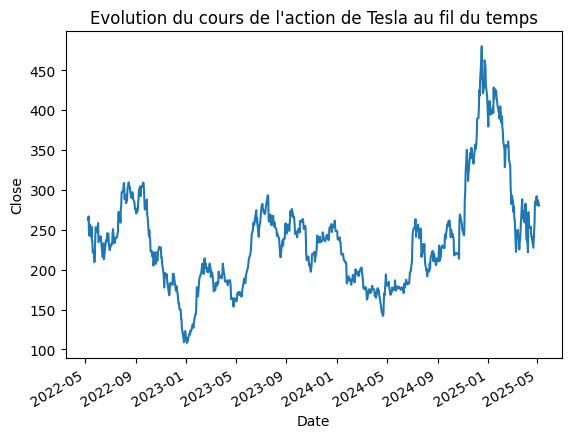

In [43]:
data['Close'].plot()
plt.title("Evolution du cours de l'action de Tesla au fil du temps")
plt.ylabel("Close")
plt.show()


# **Preprocessing des données**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# 2. Prétraitement des données
# ----------------------------
print("\n2. Prétraitement des données")

# Nous nous concentrons sur la colonne 'Close' pour cet exercice
df = data["Close"].values.reshape(-1, 1)

# Normalisation des données
print("Normalisation des données...")
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)


2. Prétraitement des données
Normalisation des données...


In [46]:
"""# 2. Prétraitement des données
# ----------------------------
print("\n2. Prétraitement des données")

# Nous nous concentrons sur la colonne 'Global_active_power' pour cet exercice
data = df['Global_active_power'].values.reshape(-1, 1)

# Normalisation des données
print("Normalisation des données...")
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)"""

'# 2. Prétraitement des données\n# ----------------------------\nprint("\n2. Prétraitement des données")\n\n# Nous nous concentrons sur la colonne \'Global_active_power\' pour cet exercice\ndata = df[\'Global_active_power\'].values.reshape(-1, 1)\n\n# Normalisation des données\nprint("Normalisation des données...")\nscaler = MinMaxScaler(feature_range=(0, 1))\nscaled_data = scaler.fit_transform(data)'

# **Création des séquences et split**

In [47]:
# 3. Préparation des séquences d'entrées/sorties
# ----------------------------------------------
print("\n3. Création des séquences d'entrée/sortie")

# Définir la taille des séquences d'entrée (lookback) et le délai de prédiction
lookback = 24  # 24 heures (1 jour) de données pour prédire
forecast = 1    # Prédire 1 heure dans le futur

# Fonction pour créer des séquences
def create_sequences(data, lookback, forecast):
    X, y = [], []
    for i in range(len(data) - lookback - forecast + 1):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback+forecast-1])
    return np.array(X), np.array(y)

# Créer les séquences
X, y = create_sequences(scaled_data, lookback, forecast)
print(f"Forme de X: {X.shape} - Séquences de {lookback} points")
print(f"Forme de y: {y.shape} - Valeurs cibles")

# Division en ensembles d'entraînement et de test (80% / 20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Données d'entraînement: {X_train.shape[0]} séquences")
print(f"Données de test: {X_test.shape[0]} séquences")

# Reshape pour LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


3. Création des séquences d'entrée/sortie
Forme de X: (726, 24, 1) - Séquences de 24 points
Forme de y: (726, 1) - Valeurs cibles
Données d'entraînement: 580 séquences
Données de test: 146 séquences


# **Création du modèle LSTM**

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop


# 4. Construction du modèle LSTM
# ------------------------------
print("\n4. Construction du modèle LSTM")

# Définir l'architecture du modèle
def build_gru_model(lookback):
    model = Sequential()
    # Première couche LSTM avec 50 unités et retour des séquences
    model.add(GRU(units=50, input_shape=(lookback, 1)))  # return_sequences=True,
    model.add(Dropout(0.2))

    # Seconde couche LSTM
    #.add(GRU(units=50))
    #model.add(Dropout(0.2))
    
    # Couche de sortie (prédiction d'une seule valeur)
    model.add(Dense(units=1))
    
    # Compilation du modèle
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Construire le modèle
model = build_gru_model(lookback)
model.summary()


4. Construction du modèle LSTM


c:\Users\LENOVO\Documents\VENV\NLP\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_13 (GRU)                    │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
import tensorflow

# **Entrainement du modèle**

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

# 5. Entraînement du modèle
# -------------------------
print("\n5. Entraînement du modèle")

# Définir les callbacks pour l'entraînement
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

# Entraîner le modèle
epochs = 100
batch_size = 32

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
    )


5. Entraînement du modèle
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0818 - val_loss: 0.0038
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0092 - val_loss: 0.0050
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0072 - val_loss: 0.0027
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0056 - val_loss: 0.0027
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 12/100
15/15 ━━━━━━

# **Evaluation du modèle**

## **Courbe de perte**


6. Évaluation du modèle


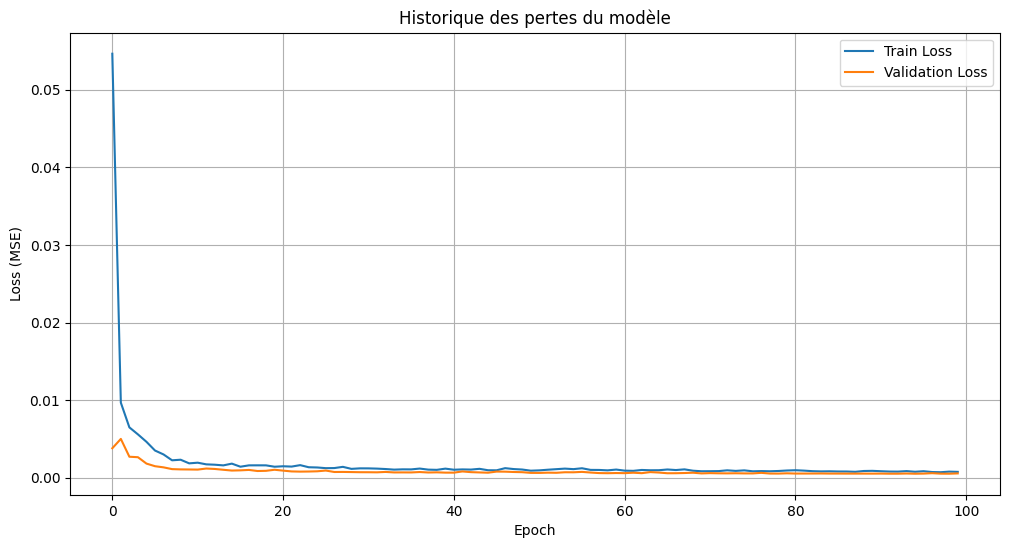

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Métriques d'entraînement:
RMSE: 8.0668
MAE: 6.1510
R²: 0.9643

Métriques de test:
RMSE: 16.7222
MAE: 12.6825
R²: 0.9462


In [79]:
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 6. Évaluation du modèle
# -----------------------
print("\n6. Évaluation du modèle")

# Visualiser l'historique d'entraînement
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Historique des pertes du modèle')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Faire des prédictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverser la normalisation

train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)

# Calculer les métriques d'erreur
train_rmse = math.sqrt(mean_squared_error(y_train_inv, train_predictions))
test_rmse = math.sqrt(mean_squared_error(y_test_inv, test_predictions))
train_mae = mean_absolute_error(y_train_inv, train_predictions)
test_mae = mean_absolute_error(y_test_inv, test_predictions)
train_r2 = r2_score(y_train_inv, train_predictions)
test_r2 = r2_score(y_test_inv, test_predictions)

print(f"Métriques d'entraînement:")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"R²: {train_r2:.4f}")

print(f"\nMétriques de test:")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R²: {test_r2:.4f}")

In [54]:
print(train_predictions.shape)  # (samples, features, 1) 


(580, 1)


## **Enregistrement du modèle**

In [81]:
model.save("modelCC.keras")

In [80]:
model.save("modelCC.h5")

## **Valeurs prédites vs valeurs réelles**


7. Visualisation des prédictions


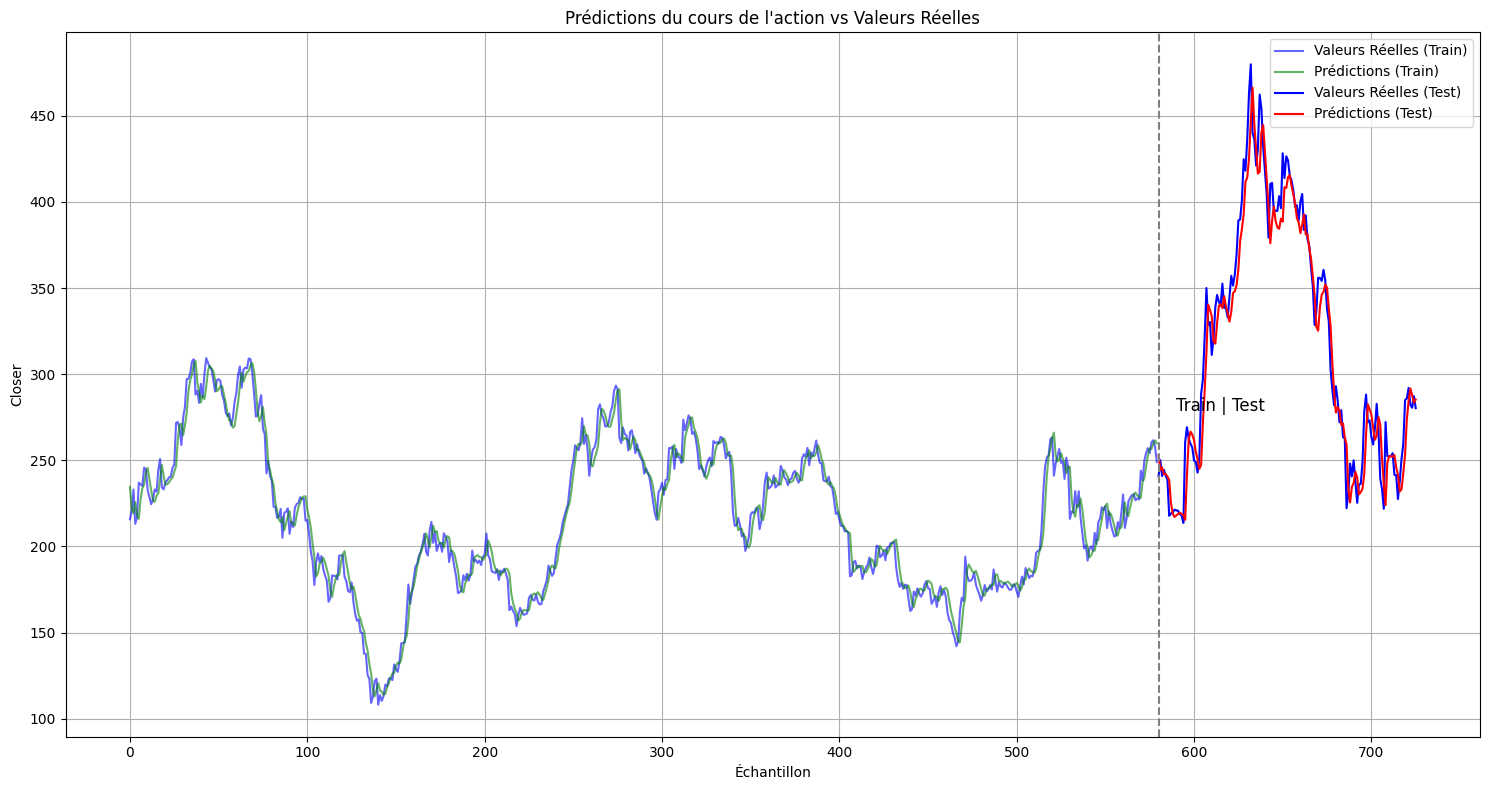

In [82]:
# 7. Visualisation des prédictions
# --------------------------------
print("\n7. Visualisation des prédictions")

# Préparer les indices pour le traçage
train_size_adj = len(y_train_inv)
test_size_adj = len(y_test_inv)

# Créer une visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(15, 8))

# Tracer les données d'entraînement
plt.plot(range(train_size_adj), y_train_inv, label='Valeurs Réelles (Train)', color='blue', alpha=0.6)
plt.plot(range(train_size_adj), train_predictions, label='Prédictions (Train)', color='green', alpha=0.6)

# Tracer les données de test
plt.plot(range(train_size_adj, train_size_adj + test_size_adj), y_test_inv, 
         label='Valeurs Réelles (Test)', color='blue')
plt.plot(range(train_size_adj, train_size_adj + test_size_adj), test_predictions, 
         label='Prédictions (Test)', color='red')

# Ajouter une ligne verticale pour séparer train/test
plt.axvline(x=train_size_adj, color='gray', linestyle='--')
plt.text(train_size_adj + 10, np.max(y_train_inv) * 0.9, 'Train | Test', fontsize=12)

plt.title("Prédictions du cours de l'action vs Valeurs Réelles")
plt.xlabel('Échantillon')
plt.ylabel('Closer')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Analyse des erreurs**


8. Analyse des erreurs


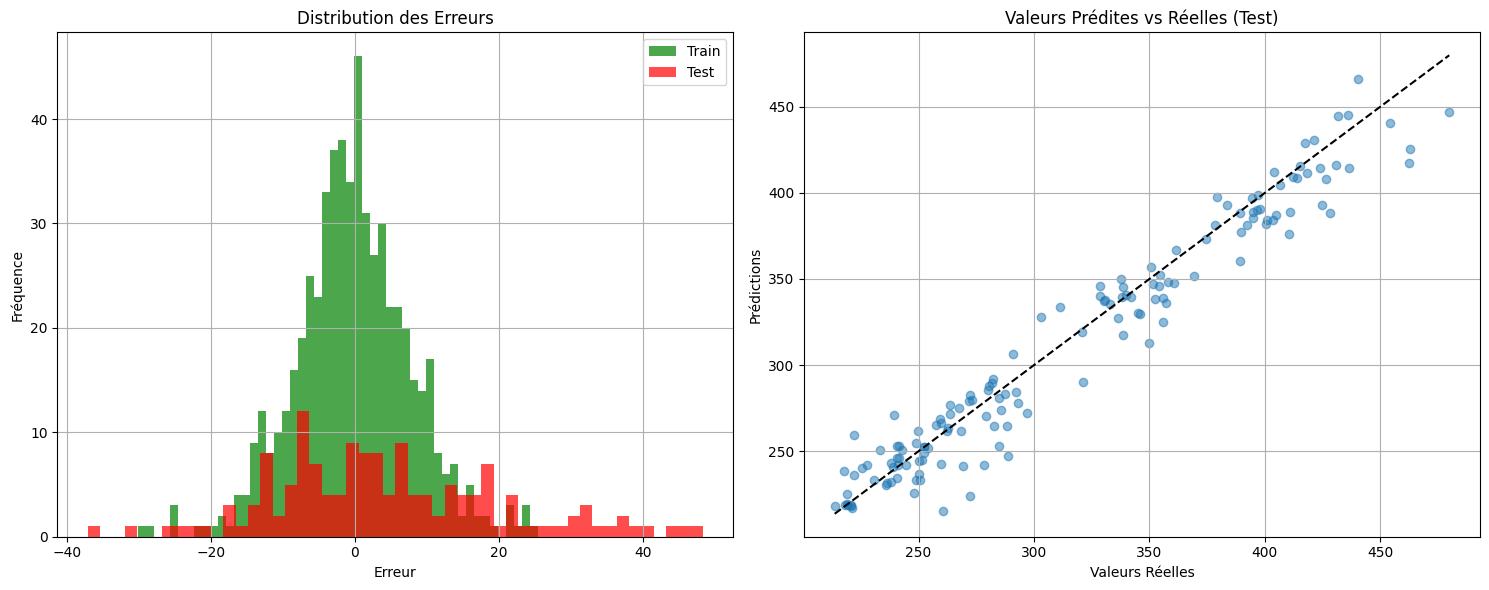

In [83]:
# 8. Analyse des erreurs
# ----------------------
print("\n8. Analyse des erreurs")

# Calculer les erreurs
train_errors = y_train_inv.flatten() - train_predictions.flatten()
test_errors = y_test_inv.flatten() - test_predictions.flatten()

# Distribution des erreurs
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(train_errors, bins=50, alpha=0.7, color='green')
plt.hist(test_errors, bins=50, alpha=0.7, color='red')
plt.title('Distribution des Erreurs')
plt.xlabel('Erreur')
plt.ylabel('Fréquence')
plt.legend(['Train', 'Test'])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test_inv, test_predictions, alpha=0.5)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'k--')
plt.title('Valeurs Prédites vs Réelles (Test)')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.grid(True)

plt.tight_layout()
plt.show()


# **Prédiction future (2 semaines )**


9. Prédictions futures
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

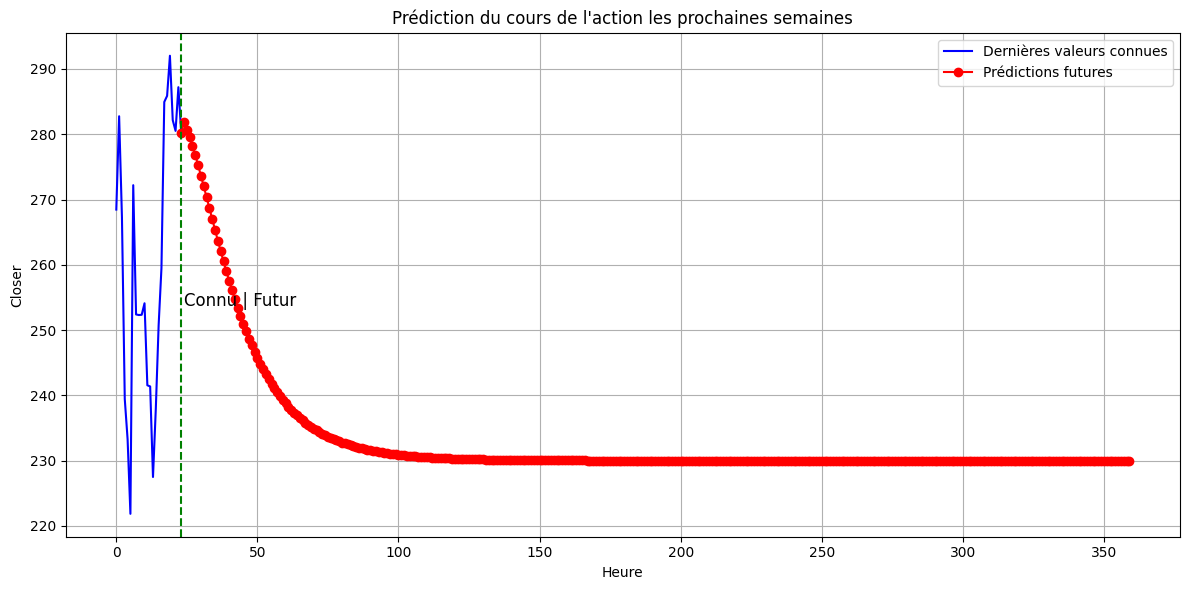

In [ ]:
# 9. Prédictions futures
# ----------------------
print("\n9. Prédictions futures")

# Prendre les dernières données connues pour prédire les prochaines valeurs
last_sequence = scaled_data[-lookback:].reshape(1, lookback, 1)

# Prédire les prochaines heures
future_predictions = []
current_sequence = last_sequence.copy()

for _ in range(336):  # Prédire 336 heures (2 semaines) dans le futur
    # Faire une prédiction
    next_pred = model.predict(current_sequence)[0]
    # Ajouter à nos prédictions
    future_predictions.append(next_pred[0])
    # Mettre à jour la séquence courante (supprimer le premier élément et ajouter la nouvelle prédiction)
    current_sequence = np.append(current_sequence[:, 1:, :], [[next_pred]], axis=1)

# Inverser la normalisation pour obtenir les valeurs réelles
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Prédictions des 5 prochaines heures:")
for i, pred in enumerate(future_predictions):
    print(f"Heure {i+1}: {pred[0]:.4f} kW")

plt.figure(figsize=(12, 6))

# Dernières valeurs connues
plt.plot(range(lookback), scaler.inverse_transform(last_sequence.reshape(-1, 1)), 
         label='Dernières valeurs connues', color='blue')

# Dernière valeur connue + prédictions futures
last_known = scaler.inverse_transform(last_sequence[0, -1].reshape(-1, 1))
pred_values = np.vstack([last_known, future_predictions])
x_range = range(lookback - 1, lookback - 1 + len(pred_values))

plt.plot(x_range, pred_values, label='Prédictions futures', color='red', marker='o')

# Ligne de séparation
plt.axvline(x=lookback-1, color='green', linestyle='--')
plt.text(lookback, np.max(future_predictions) * 0.9, 'Connu | Futur', fontsize=12)

plt.title("Prédiction du cours de l'action les prochaines semaines")
plt.xlabel('Heure')
plt.ylabel('Closer')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
